# Linear regression in ML

Simple to implement. For this reason, many people choose to use a linear regression model as a baseline model, to compare if another model can outperform such a simple model.

## Calculating methods


1. Analytic   
2. Statistics
3. ML



# Introduction
Data having linear relationship


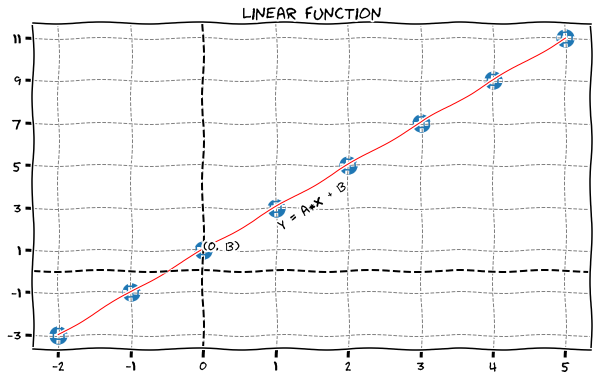

In [ ]:
import matplotlib.pyplot as plt

x = (-2, -1, 0, 1, 2, 3, 4, 5)
y = (-3, -1, 1, 3, 5, 7, 9, 11)

with plt.xkcd():  
  fig1 = plt.figure(figsize=(10,6))
  plt.plot(x, [x_i*2 + 1 for x_i in x] ,color="red", linewidth=1)
  plt.yticks(range(-3, 12, 2))
  plt.grid(color='gray', linestyle='--', linewidth=1)
  plt.axhline(0, color="k", linestyle='--')
  plt.axvline(0, color="k", linestyle='--')
  plt.text(1, 2, 'y = a*x + b', rotation=32)
  plt.text(0,1, '(0, b)')
  plt.scatter(x,y, s=300)
  plt.title("Linear function")

  plt.show()

# Common functions

### Task1 Plot data

Implement common method ploting data and predcited points

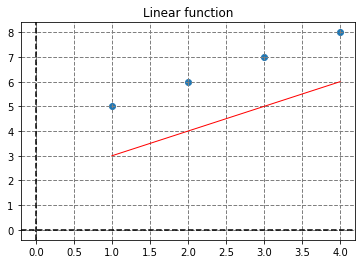

In [ ]:
from typing import List

def plot_linear(x:List[float], y:List[float], predict:List[float]):
  plt.plot(x, predict, color = "red", linewidth = 1)
  plt.grid(color = "gray", linestyle = "--", linewidth = 1)
  plt.axhline(0, color = "black", linestyle = "--")
  plt.axvline(0, color = "black", linestyle = "--")
  plt.scatter(x,y)
  plt.title("Linear function")
  plt.show()

plot_linear([1,2,3,4],[5,6,7,8],[3,4,5,6])


  


# Simplified analytical approach





###  Linear function in scope/intercept form
$$ y = ax + b $$

## Slope $a$
 $$ a = \frac{\Delta y}{\Delta x} = \frac{y1 - y2}{x1 - x2}$$

## Intercept $b$
 $$ b = y - a * x $$

### Task 2 AnalyticalLinearRegression

Implement AnalyticalLinearRegression class calculating slope and y-intercept by analytical method

2.0
1.0


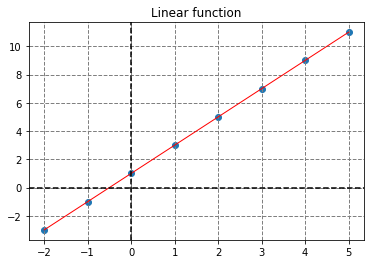

In [ ]:
class AnalyticalLinearRegression():
    def __init__(self):
        self.slope = 0
        self.intercept = 0

    def fit(self, x: List[float],  y:List[float]):
        self.slope = (y[1] - y[0]) / float(x[1] - x[0])
        self.intercept = y[0] - self.slope * x[0]
        print(self.slope)
        print(self.intercept)

    def predict(self, x:List[float]) -> List[float]:
      return [x_i * self.slope + self.intercept for x_i in x] 

# test run
analytical = AnalyticalLinearRegression()
analytical.fit(x, y)
plot_linear(x,y, analytical.predict(x))        

## Analytical multiple Linear Regression

https://mlfromscratch.com/linear-regression-from-scratch/#code-for-multiple-linear-regression

### Task 3 Self study

Check existing analytical implementation of multiple linear regressor

$$y=β0+β1x1+β2x2+...+βixi+ε $$



* $β_0$ is known as the intercept
* $β_1$ to $β_i$ are known as coefficients
* $x_1$ to $x_i$ are the features of our dataset
* $ε$ are the residual terms


$$ y = \left[ \begin{array}{r}
y_1 \\
y_2\\
...\\ 
y_n 
\end{array}\right], X = \left[ \begin{array}{r}
X_0^T \\
X_1^T\\
...\\ 
X_n^T 
\end{array}\right], \beta =  \left[ \begin{array}{r}
\beta_1 \\
\beta_2\\
...\\ 
\beta_n 
\end{array}\right], ε =  \left[ \begin{array}{r}
ε_1 \\
ε_2\\
...\\ 
ε_n 
\end{array}\right]$$

### Calculated Ordinary less square 

$$\hatβ=(X^TX)^{−1}X^Ty$$

In [ ]:
import numpy as np
import copy

class MultipleLinearRegression():
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x, y):
        # prepare x and y values for coefficient estimates
        x = self._transform_x(x)
        y = self._transform_y(y)

        betas = self._estimate_coefficients(x, y)
        
        # intercept becomes a vector of ones
        self.intercept = betas[0]

        # coefficients becomes the rest of the betas
        self.coefficients = betas[1:]

    def predict(self, x):
        '''
            y = b_0 + b_1*x + ... + b_i*x_i
        '''
        predictions = []
        for index, row in x.iterrows():
            values = row.values

            pred = np.multiply(values, self.coefficients)
            pred = sum(pred)
            pred += self.intercept

            predictions.append(pred)

        return predictions

    def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values = y_true.values
        y_average = np.average(y_values)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_values)):
            residual_sum_of_squares += (y_values[i] - y_pred[i])**2
            total_sum_of_squares += (y_values[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        x.insert(0, 'ones', np.ones( (x.shape[0], 1) ))
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values

    def _estimate_coefficients(self, x, y):
        '''
            β = (X^T X)^-1 X^T y
            Estimates both the intercept and all coefficients.
        '''
        xT = x.transpose()

        inversed = np.linalg.inv( xT.dot(x) )
        coefficients = inversed.dot( xT ).dot(y)

        return coefficients

# "Real life" data

## Task 

Just generate a few points with random  noise

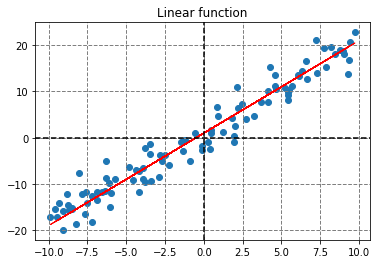

In [ ]:
import numpy as np

np.random.seed(42)

n = 100
x = np.random.uniform(-10,10, n)
noise = np.random.normal(0, 3, n)
true_slope = 2
true_intercept = 1

y = true_slope * x + true_intercept + noise

plot_linear(x, y, x * 2 +1)        

# Statistical calculation method

**Ordinary Least Mean Square Method**

1. Calculate Mean and Variance.
2. Calculate Covariance.
3. Estimate Coefficients.




 ### Covariance
 In probability theory and statistics, covariance is a measure of how much two variables change together.

 $$covariance (x,y) = \sum_{i=0}^{n}(x_i−\overline{x})(y_i−\overline{y})$$
 
### Variance

In statistics, the variance function is a smooth function which depicts the variance of a random quantity as a function of its mean.

$$variance(x) = \sum_{i=0}^{n}(x_i−\overline{x})^2$$


$$slope(x,y) = \frac{cov(x,y)} {var(x)}$$



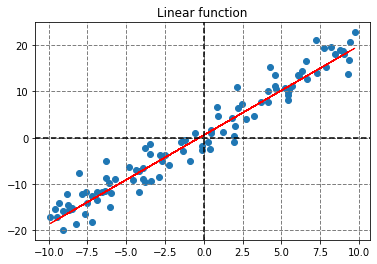

In [ ]:
class StatisticalLinearRegression():
    def __init__(self):
        self.slope = 0
        self.intercept = 0

    def __variance__(self, x:List[float], mean:float):
      return sum([(x_i - mean)**2 for x_i in x])
	 
    def __covariance__(self, x:List[float], mean_x:float, y:List[float], mean_y:float):
      covar = 0
      for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
      return covar  

    def fit(self, x: List[float],  y:List[float]):
      mean_x = sum(x) / float(len(x))
      mean_y = sum(x) / float(len(y))
      self.slope = self.__covariance__(x, mean_x, y, mean_y) / self.__variance__(x, mean_x)
      self.intercept = mean_y - self.slope * mean_x

    def predict(self, x:List[float]):
      return [x_i * self.slope + self.intercept for x_i in x]

statistical = StatisticalLinearRegression()
statistical.fit(x, y)
plot_linear(x,y, statistical.predict(x))   

# Linear model with ML approach



## Train, test split

### Optional task 
just as exercise

In [ ]:
import random

def train_test_split(x: List[float],  y:List[float], split=0.60) -> (List[float], List[float], List[float], List[float]):
  pass

train_x, tran_y, test_x, test_y = train_test_split(x,y)

## Residual square error (RSS)

 Residual sum of squares (RSS) or Sum of squared errors $SSE$ and is one of many error functions we can use to quantify the algorithms "wrongdoing", in ML as cost function. The following is the mathematical formula for SSE:

 $$SSE= \sum_{i=1}^{n}(y_i−f(x_i))^2$$


## Task Implement SSE

In [ ]:
def sum_squared_error(ys: List[float], ys_pred: List[float]) -> float:
    assert len(ys) == len(ys_pred)
    return sum([(y - ys_pred) ** 2 for y, ys_pred in zip(ys, ys_pred)]) 

assert sum_squared_error([1, 2, 3], [4, 5, 6]) == 27


# Gradient descent
https://www.youtube.com/watch?v=L-Lsfu4ab74



 $$SSE= \sum_{i=1}^{n}(y_i−(mx_i+b))^2$$


$$ \frac{\partial SSE}{\partial m} = 2x((mx+b)−y)  $$

$$ \frac{\partial SSE}{\partial b} = 2((mx+b)−y)  $$



## Task Implement LinearRegression

Epoch 1 --> loss: 12024.811129276346
Epoch 101 --> loss: 790.7971684012011
Epoch 201 --> loss: 769.5703653091201
Epoch 301 --> loss: 755.2914087897271
Epoch 401 --> loss: 745.6840542148889
Epoch 501 --> loss: 739.2199080558986
Epoch 601 --> loss: 734.8706165585054
Epoch 701 --> loss: 731.9442692785958
Epoch 801 --> loss: 729.975325967308
Epoch 901 --> loss: 728.6505557359412


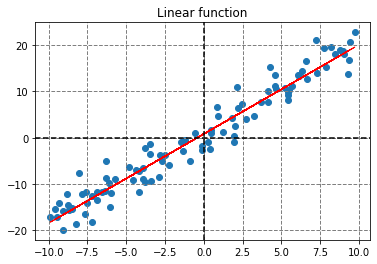

In [ ]:
class LinearRegression():
    def __init__(self):
        self.slope = None
        self.intercept = None
  
    def fit(self, x: List[float],  y:List[float], epochs:int = 1000):      
      learning_rate : float = 0.00001

      m: float = 0
      b: float = 0

      for epoch in range(epochs):
        ys_pred:List[float] = [m * x_i + b for x_i in x]

        
        if epoch % 100 == True:
          loss = sum_squared_error(y, ys_pred)
          print(f'Epoch {epoch} --> loss: {loss}') 

        grad_m : float = sum ([2 * ((m * x_i + b) - y_i) * x_i for x_i, y_i in zip(x, y)]) 
        grad_b : float = sum([2 * ((m * x_i + b) - y_i) for x_i, y_i in zip(x, y)]) 
        m = m + (grad_m * -learning_rate)
        b = b + (grad_b * -learning_rate)
      self.slope = m
      self.intercept = b  

    def predict(self, x:List[float]):
      return [x_i * self.slope + self.intercept for x_i in x]  

linear = LinearRegression()
linear.fit(x, y, 1000)
plot_linear(x,y, linear.predict(x))       

# Sklearn

## Task Compare with sklearn

## Task Calculate LinearRegression with sklearn 

